In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Download scripts from figshare
!( \
if [ ! -d ./scripts ]; then \
wget https://figshare.com/ndownloader/files/44297132?private_link=9b9e89ff3150aebb6d7a -O ./scripts.zip; \
unzip scripts.zip; rm scripts.zip; \
fi)

In [3]:
from scripts.add_gene_tile_info import add_gene_info
import scripts.utils_GWAS as utils_GWAS
import scripts.utils_eQTL as utils_eQTL
import scripts.utils_RegulomeDB as utils_RegulomeDB

In [4]:
# make tmp directory
os.makedirs("./tmp/", exist_ok=True)
os.makedirs("./scarlink_outs/", exist_ok=True)

### Download data files and SCARlink models from figshare

In [5]:
# Data files
!( \
if [ ! -d ./fig_data ]; then \
wget https://figshare.com/ndownloader/files/44312828?private_link=9b9e89ff3150aebb6d7a -O ./fig_data.zip; \
unzip fig_data.zip; rm fig_data.zip; \
fi)

In [6]:
# PBMC
!( \
if [ ! -d ./scarlink_outs/pbmc_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297825?private_link=9b9e89ff3150aebb6d7a -O ./pbmc_all_out_10k.zip; \
unzip pbmc_all_out_10k.zip; rm pbmc_all_out_10k.zip; \
fi)

In [7]:
# Pancreas
!( \
if [ ! -d ./scarlink_outs/panc_p1_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44297267?private_link=9b9e89ff3150aebb6d7a -O ./panc_p1_all_out_10k.zip; \
unzip panc_p1_all_out_10k.zip; rm panc_p1_all_out_10k.zip; \
fi)

In [8]:
# Pituitary
!( \
if [ ! -d ./scarlink_outs/pituitary_all_out_10k ]; then \
cd ./scarlink_outs; \
wget https://figshare.com/ndownloader/files/44313044?private_link=9b9e89ff3150aebb6d7a -O ./pituitary_all_out_10k.zip; \
unzip pituitary_all_out_10k.zip; rm pituitary_all_out_10k.zip; \
fi)

### Download necessary files

In [9]:
# download hg38 GTF 
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.refGene.gtf.gz -O ./tmp/hg38.refGene.gtf.gz

# download LD
!wget https://raw.githubusercontent.com/jmacdon/LDblocks_GRCh38/master/data/pyrho_EUR_LD_blocks.bed -O ./tmp/pyrho_EUR_LD_blocks.bed

# download and extract splicing QTL
!wget https://storage.googleapis.com/adult-gtex/bulk-qtl/v8/single-tissue-cis-qtl/GTEx_Analysis_v8_sQTL.tar -O ./tmp/GTEx_Analysis_v8_sQTL.tar
!tar -xvf ./tmp/GTEx_Analysis_v8_sQTL.tar --directory ./tmp/

# UK Biobank
!wget https://www.dropbox.com/s/cdsdgwxkxkcq8cn/UKBB_94traits_release1.1.tar.gz -O ./tmp/UKBB_94traits_release1.1.tar.gz
!tar -xvzf ./tmp/UKBB_94traits_release1.1.tar.gz --directory ./tmp/

# RegulomeDB
!wget https://www.encodeproject.org/files/ENCFF250UJY/@@download/ENCFF250UJY.tsv -O ./tmp/ENCFF250UJY.tsv

--2024-01-30 17:06:31--  https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.refGene.gtf.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23614606 (23M) [application/x-gzip]
Saving to: ‘./tmp/hg38.refGene.gtf.gz’

100%[======================================>] 23,614,606  19.8MB/s   in 1.1s   

2024-01-30 17:06:32 (19.8 MB/s) - ‘./tmp/hg38.refGene.gtf.gz’ saved [23614606/23614606]

--2024-01-30 17:06:33--  https://raw.githubusercontent.com/jmacdon/LDblocks_GRCh38/master/data/pyrho_EUR_LD_blocks.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31840 (31K) [te

In [10]:
# inputs
gtf_file = "./tmp/hg38.refGene.gtf.gz"
ld_file = './tmp/pyrho_EUR_LD_blocks.bed'
ukbb_file = './tmp/release1.1/UKBB_94traits_release1.bed.gz'
common_snp_file = './fig_data/1000G.csv.gz'
sqtl_dir = './tmp/GTEx_Analysis_v8_sQTL/'
regdb_file = './tmp/ENCFF250UJY.tsv'

In [11]:
# ArchR peak2gene links
pbmc_peak_file = "./fig_data/pbmc_peak_gene_links.csv.gz"
panc_peak_file = "./fig_data/panc_peak_gene_links.csv.gz"
pit_peak_file = "./fig_data/pit_peak_gene_links.csv.gz"

In [12]:
# GTEx eQTL input files
blood_gtex_file = "./fig_data/whole_blood_gtex.txt.gz"
panc_gtex_file = "./fig_data/pancreas_gtex.txt.gz"
pit_gtex_file = "./fig_data/pituitary_gtex.txt.gz"

# Independent eQTL input files
blood_ind_eqtl_file = "./fig_data/Whole_Blood.v8.independent_eqtls_gene_name.csv.gz"
panc_ind_eqtl_file = "./fig_data/Pancreas.v8.independent_eqtls_gene_name.csv.gz"
pit_ind_eqtl_file = "./fig_data/Pituitary.v8.independent_eqtls_gene_name.csv.gz"

In [13]:
# PBMC
pbmc_scarlink_out = "./scarlink_outs/pbmc_all_out_10k/"
pbmc_celltype_file = pbmc_scarlink_out + "gene_linked_tiles_celltype.csv.gz" # scarlink_tiles output
pbmc_ann_celltype_file = pbmc_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

# Pancreas
panc_scarlink_out = "./scarlink_outs/panc_p1_all_out_10k/"
panc_celltype_file = panc_scarlink_out + "gene_linked_tiles_celltype.csv.gz" # scarlink_tiles output
panc_ann_celltype_file = panc_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

# Pituitary
pit_scarlink_out = "./scarlink_outs/pituitary_all_out_10k/"
pit_celltype_file = pit_scarlink_out + "gene_linked_tiles_celltype.csv.gz"
pit_ann_celltype_file = pit_scarlink_out + "gene_linked_tiles_celltype_ann_hvg.csv.gz"

### Annotate tiles as downstream, promoter proximal, gene body, or distal

In [14]:
add_gene_info(pbmc_scarlink_out, pbmc_celltype_file, gtf_file, pbmc_ann_celltype_file)
add_gene_info(panc_scarlink_out, panc_celltype_file, gtf_file, panc_ann_celltype_file)
add_gene_info(pit_scarlink_out, pit_celltype_file, gtf_file, pit_ann_celltype_file)

N genes: 1246
Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
Iter 800
Iter 900
Iter 1000
Iter 1100
Iter 1200
N genes: 1215
Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
Iter 800
Iter 900
Iter 1000
Iter 1100
Iter 1200


### GWAS 

In [15]:
pbmc_ukbb_file = "./tmp/pbmc_ukbb.csv.gz"
panc_ukbb_file = "./tmp/panc_ukbb.csv.gz"
pit_ukbb_file = "./tmp/pit_ukbb.csv.gz"

In [16]:
utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              pbmc_ann_celltype_file, pbmc_peak_file, tissue='PBMC', celltype_col='celltype', 
                                                 outfile=pbmc_ukbb_file)

utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              panc_ann_celltype_file, panc_peak_file, tissue='Pancreas', celltype_col='celltype', 
                                                 outfile=panc_ukbb_file)

utils_GWAS.merge_tiles_peaks(ukbb_file, common_snp_file, ld_file, gtf_file, 
                                              pit_ann_celltype_file, pit_peak_file, tissue='Pituitary', celltype_col='celltype', 
                                                 outfile=pit_ukbb_file)

Cutoff: 8.775801868968575e-14 1.1571050354699101e-95
p-value: 0.0332
Cutoff: 1.2774348397828822e-08 1.30388602887809e-54
p-value: 0.0062
Cutoff: 5.680643273194791e-06 7.159820737119141e-31
p-value: 0.0
Cutoff: 0.0002008276268384 1.3439492602811001e-15
p-value: 0.0064
Cutoff: 0.0023984971036297 6.32968457757771e-07
p-value: 0.0132


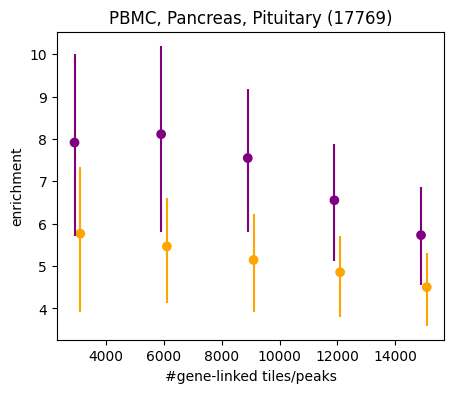

In [17]:
utils_GWAS.plot_enrichment_per_gene_linked_tiles_peaks([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir)
plt.savefig('./tmp/gwas_tiles.pdf', transparent=True)

PIP > 0.1:
p-value: 0.0
PIP > 0.2:
p-value: 0.0024
PIP > 0.5:
p-value: 0.0
PIP > 0.7:
p-value: 0.0
PIP > 0.9:
p-value: 0.0


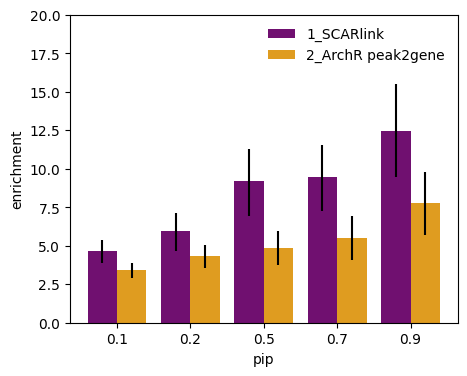

In [18]:
utils_GWAS.plot_gwas_bar([pbmc_ukbb_file, panc_ukbb_file, pit_ukbb_file], 
                                                       ukbb_file, sqtl_dir)
plt.savefig('./tmp/gwas_bar.pdf', transparent=True)

## eQTL

#### GTEx

In [19]:
pbmc_gtex_outfile = "./tmp/pbmc_gtex.csv.gz"
panc_gtex_outfile = "./tmp/panc_gtex.csv.gz"
pit_gtex_outfile = "./tmp/pit_gtex.csv.gz"
pbmc_panc_gtex_outfile = "./tmp/pbmc_panc_gtex.csv.gz"
pbmc_pit_gtex_outfile = "./tmp/pbmc_pit_gtex.csv.gz"

In [20]:
# matched tissue
utils_eQTL.merge_common_tile_peaks(blood_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='PBMC',
                                   outfile=pbmc_gtex_outfile)
utils_eQTL.merge_common_tile_peaks(panc_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   panc_ann_celltype_file, panc_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=panc_gtex_outfile)
utils_eQTL.merge_common_tile_peaks(pit_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pit_gtex_outfile)

In [21]:
# mismatched tissue
utils_eQTL.merge_common_tile_peaks(panc_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=pbmc_panc_gtex_outfile)
utils_eQTL.merge_common_tile_peaks(pit_gtex_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pbmc_pit_gtex_outfile)

p-value: 0.9436
p-value: 0.0064
p-value: 0.0
p-value: 0.0008
p-value: 0.0008


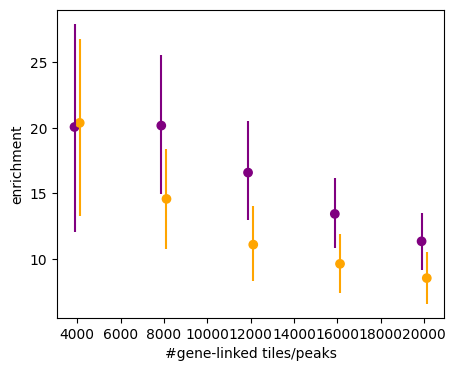

In [22]:
utils_eQTL.plot_tile_count(pbmc_gtex_outfile, n_link_cutoffs=np.arange(4, 21, 4).astype(int)*1000, shift=120)

n vars: 281 80 38
PBMC
p-value: 0.0008
Pancreas
p-value: 0.0352
Pituitary
p-value: 0.3936


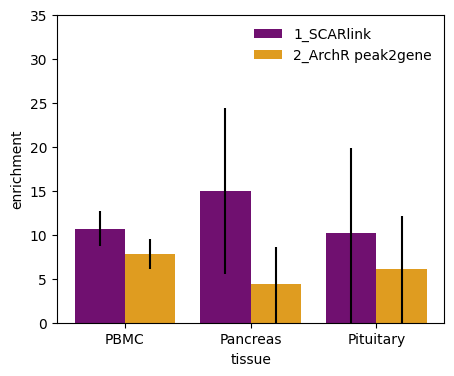

In [23]:
# matched tissue
utils_eQTL.compare_enrichment_recall_tissue(pbmc_gtex_outfile, panc_gtex_outfile, pit_gtex_outfile, 
                                            o0="PBMC", o1="Pancreas", o2="Pituitary", p_cutoff=1e-3)
plt.ylim((0, 35))
plt.savefig('./tmp/gtex_bar.pdf', transparent=True)

n vars: 281 85 36
PBMC
p-value: 0.0008
Pancreas
p-value: 0.15560000000000002
Pituitary
p-value: 0.0454


(0.0, 15.0)

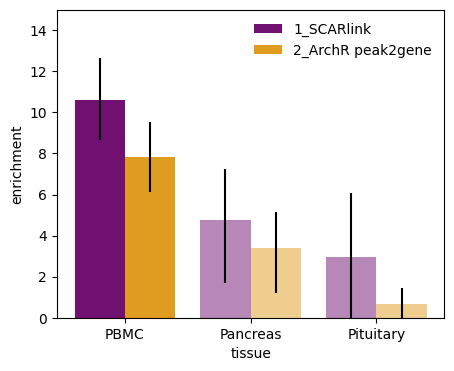

In [24]:
# mismatched tissue
utils_eQTL.compare_enrichment_recall_tissue(pbmc_gtex_outfile, pbmc_panc_gtex_outfile, pbmc_pit_gtex_outfile, 
                                            o0="PBMC", o1="Pancreas", o2="Pituitary", p_cutoff=1e-3,
                                            alphas=[1, 0.5, 0.5])
plt.ylim((0, 15))

#### Independent eQTL

In [25]:
pbmc_ind_eqtl_outfile = "./tmp/pbmc_ind_eqtl.csv.gz"
panc_ind_eqtl_outfile = "./tmp/panc_ind_eqtl.csv.gz"
pit_ind_eqtl_outfile = "./tmp/pit_ind_eqtl.csv.gz"

In [26]:
utils_eQTL.merge_common_tile_peaks(blood_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='PBMC',
                                   outfile=pbmc_ind_eqtl_outfile, neg_pip=True)
utils_eQTL.merge_common_tile_peaks(panc_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   panc_ann_celltype_file, panc_peak_file, celltype_col='celltype', tissue='Pancreas',
                                   outfile=panc_ind_eqtl_outfile, neg_pip=True)
utils_eQTL.merge_common_tile_peaks(pit_ind_eqtl_file, common_snp_file, ld_file, gtf_file, 
                                   pit_ann_celltype_file, pit_peak_file, celltype_col='celltype', tissue='Pituitary',
                                   outfile=pit_ind_eqtl_outfile, neg_pip=True)

p-value: 0.1324
p-value: 0.3036
p-value: 0.0144
p-value: 0.048


(0.0, 39.0)

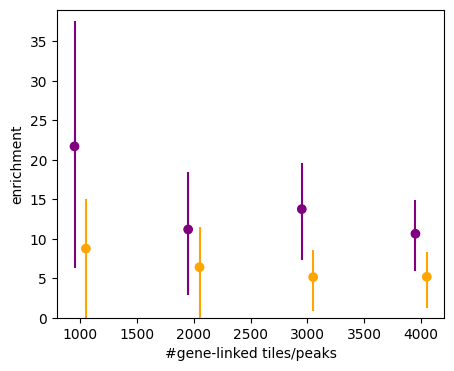

In [27]:
utils_eQTL.plot_tile_count(panc_ind_eqtl_outfile, n_link_cutoffs=np.arange(1, 5, 1).astype(int)*1000, shift=50,
                          pip=-1.1)
plt.ylim((0, 39))

n vars: 566 255 178
PBMC
p-value: 0.0
Pancreas
p-value: 0.0292
Pituitary
p-value: 0.242


(0.0, 19.0)

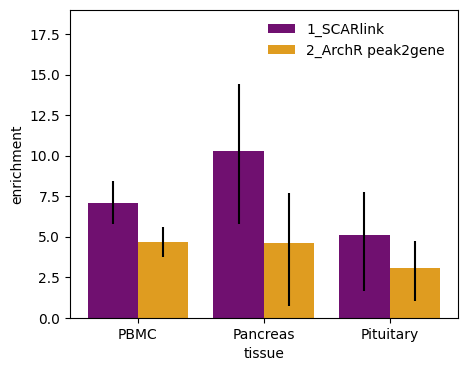

In [28]:
utils_eQTL.compare_enrichment_recall_tissue(pbmc_ind_eqtl_outfile, panc_ind_eqtl_outfile, pit_ind_eqtl_outfile, 
                                            o0="PBMC", o1="Pancreas", o2="Pituitary", p_cutoff=1e-3, pip=-1.1)
plt.ylim((0, 19))

### RegulomeDB

In [29]:
pbmc_regdb_outfile = "./tmp/pbmc_regdb.csv.gz"

In [30]:
utils_RegulomeDB.merge_tiles_peaks(regdb_file, common_snp_file, ld_file, gtf_file, 
                                   pbmc_ann_celltype_file, pbmc_peak_file, celltype_col='celltype', tissue='PBMC',
                                   outfile=pbmc_regdb_outfile)

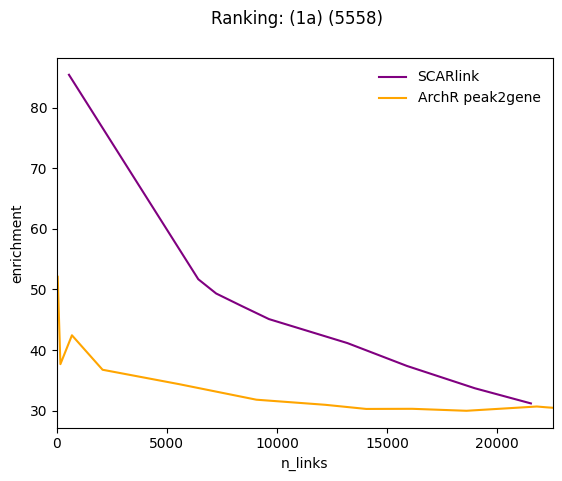

In [31]:
utils_RegulomeDB.plot_n_e_r(pbmc_regdb_outfile, pip=0.9, cutoff=0.5, ranking=['1a'])
plt.savefig('./tmp/pbmc_regdb.pdf', transparent=True)